# Census Income

#### Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


In [3]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Pre Processing

In [5]:
df.shape

(32560, 15)

In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [10]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate 

Duplicate Rows :


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18554,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [109]:
# dropping the duplicates
df.drop_duplicates(inplace=True)

In [11]:

#  check  the duplicate again
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18554,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [12]:
# again checking the data types
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [13]:
# checking the shape of dataset
df.shape

(32560, 15)

## EDA and Visualization

In [14]:

df.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

********************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
********************


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

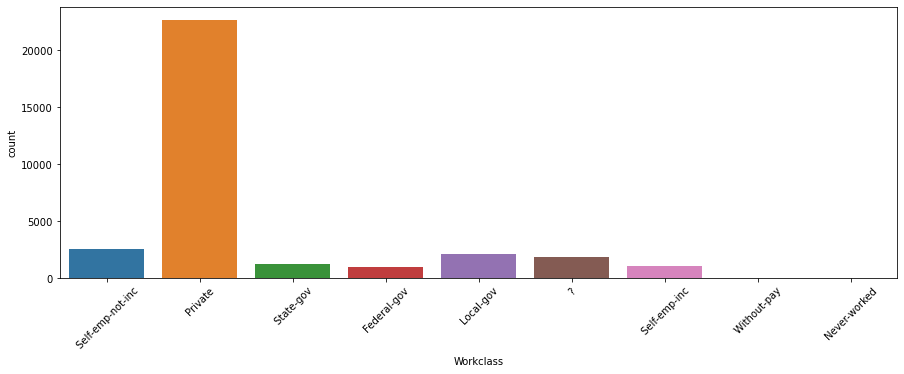

In [15]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Workclass', data = df)
print('*'*20)
print(df.Workclass.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

##### Observation : the work class of people is high from private and followed by self-employed and local government.

In [17]:
df.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

********************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
********************


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

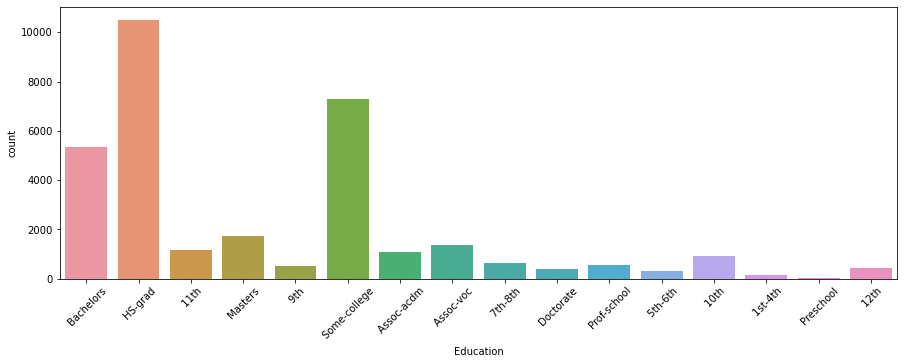

In [18]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Education', data = df)
print('*'*20)
print(df.Education.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

#### Observation: The education of people is mostly High-graduate, followed by college students followed by bachelor's degrees. and we also see some people do not complete their school as we see some count from 1th to 10th standard.

********************
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
********************


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

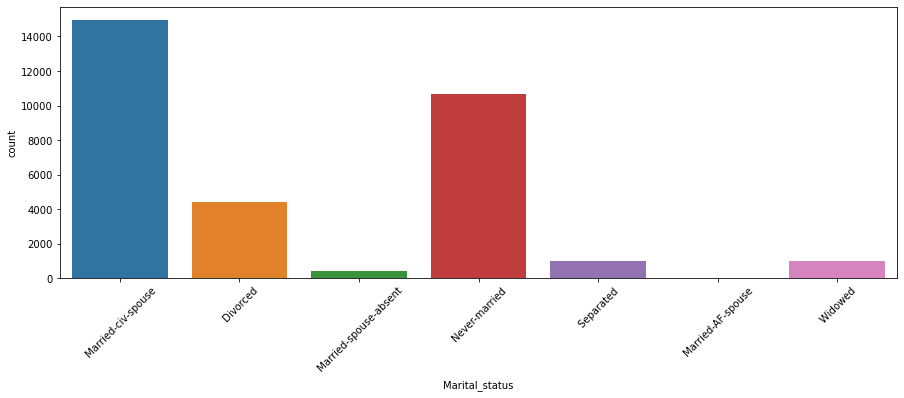

In [19]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Marital_status', data = df)
print('*'*20)
print(df.Marital_status.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

#### Observation: The martial status of the people is mostly married-civ-spouse followed by single and followed by Divorced, we see very less count in widowed and separated.

In [21]:
df.Occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

********************
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64
********************


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

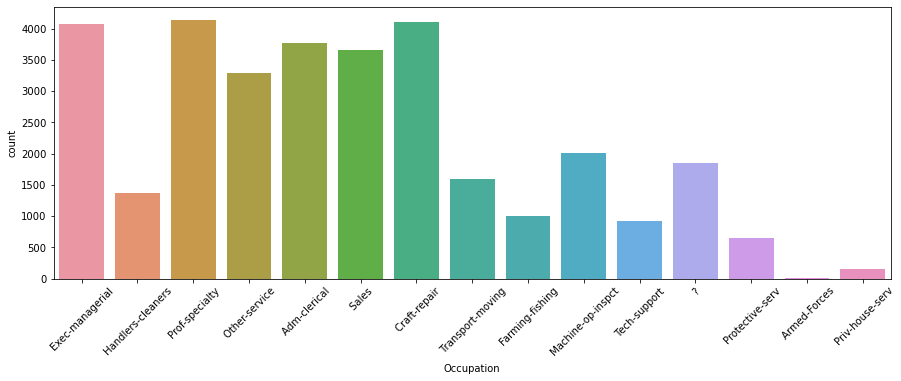

In [22]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Occupation', data = df)
print('*'*20)
print(df.Occupation.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

#### Observation : From the graph we observe the occupation of people, the people's maximum professions are Prof-specialty, Craft-repair, Exec-managerial and least is Armed-forces.

In [23]:
df.Relationship.unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

********************
 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64
********************


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

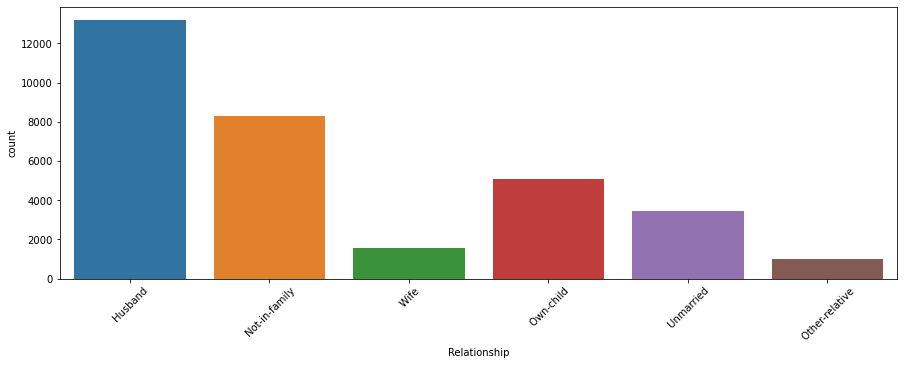

In [24]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Relationship', data = df)
print('*'*20)
print(df.Relationship.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

In [25]:
df.Race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

********************
 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64
********************


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

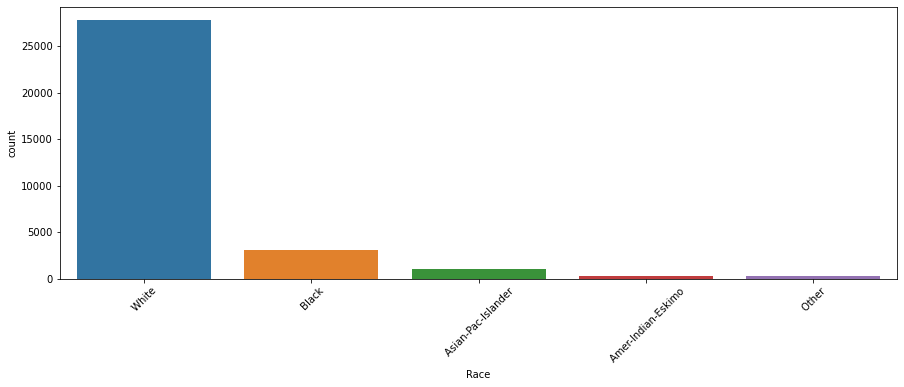

In [27]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Race', data = df)
print('*'*20)
print(df.Race.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

#### We observe White People are more as compare to other people.

In [28]:
df.Sex.unique()

array([' Male', ' Female'], dtype=object)

********************
 Male      21789
 Female    10771
Name: Sex, dtype: int64
********************


(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

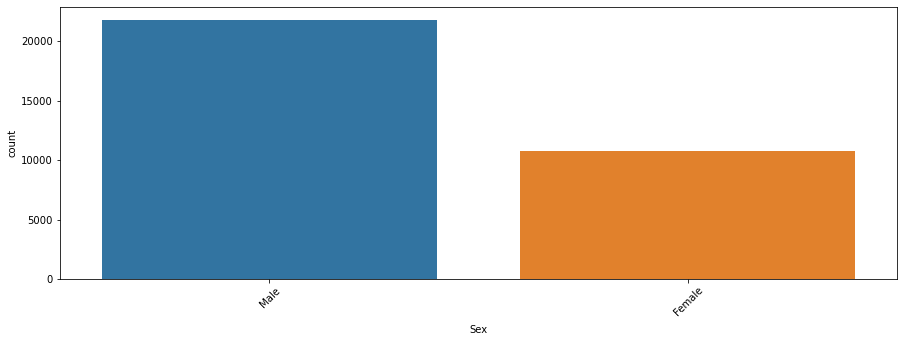

In [29]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Sex', data = df)
print('*'*20)
print(df.Sex.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

##### We obsere male are more than female in given dataset

In [30]:
df.Native_country.unique()


array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

********************
 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru            

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' ?'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England'),
  Text(10, 0, ' Canada'),
  Text(11, 0, ' Germany'),
  Text(12, 0, ' Iran'),
  Text(13, 0, ' Philippines'),
  Text(14, 0, ' Italy'),
  Text(15, 0, ' Poland'),
  Text(16, 0, ' Columbia'),
  Text(17, 0, ' Cambodia'),
  Text(18, 0, ' Thailand'),
  Text(19, 0, ' Ecuador'),
  Text(20, 0, ' Laos'),
  Text(21, 0, ' Taiwan'),
  Text(22, 0, ' Haiti'),
  Text(23, 0, ' Portugal'),
  Text(24, 0, ' Dominican-Republic'),
  Text(25, 0, ' El-Salvador'),
  Text(26, 0, ' France'),
  Text(27, 0, ' Guatemala'),
  Text(28, 0, ' China'),
  Text(29, 0, ' Japan'),
  

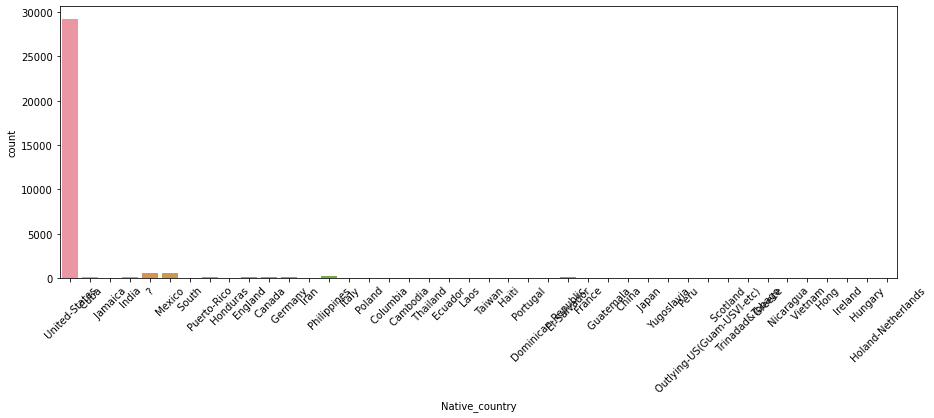

In [31]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Native_country', data = df)
print('*'*20)
print(df.Native_country.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

### People from United State are more in the given dataset

In [32]:
df.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

********************
 <=50K    24719
 >50K      7841
Name: Income, dtype: int64
********************


(array([0, 1]), [Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')])

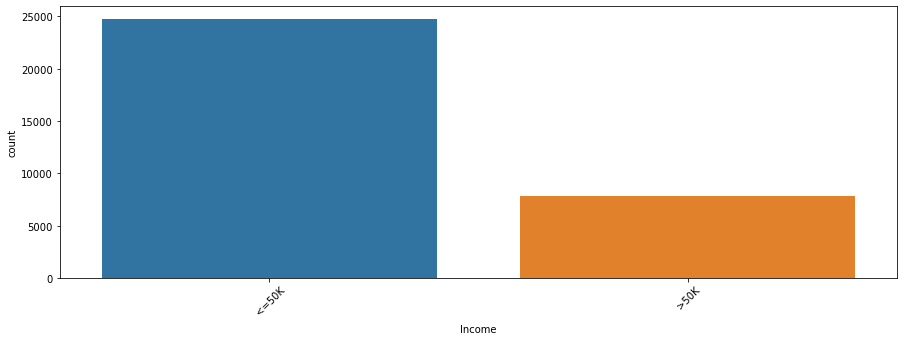

In [33]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Income', data = df)
print('*'*20)
print(df.Income.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

#### From the countplot we observe more than 65% of people cannot get Income more than 50K and from this we observe that our target varable is im-balance.

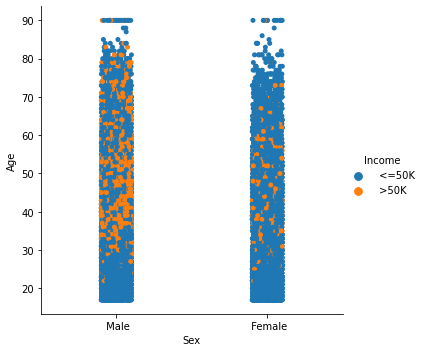

In [34]:
sns.catplot(x = 'Sex' , y = 'Age' , data = df ,hue = 'Income')
plt.show()

#### From the cat-plot, we observe people age range from 40 to 50 and above they most likely to get paid high (greater than 50k).

In [35]:
def graphs(x_feature,y_label,df):
    
    print(df[[x_feature, y_label]].groupby([x_feature], as_index=False).mean().sort_values(by=y_label, ascending=False))
    print('\n')
    print(df[x_feature].value_counts())
    print( "\n")
    sns.countplot(x=x_feature,hue=y_label,data = df)
    plt.figure(figsize = (15, 5))

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le=LabelEncoder()
df1=le.fit_transform(df['Income'])
pd.Series(df1)

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Length: 32560, dtype: int32

In [38]:
df['Income']=df1

In [39]:
def graphs(x_feature,y_label,df):
    
    print(df[[x_feature, y_label]].groupby([x_feature], as_index=False).mean().sort_values(by=y_label, ascending=False))
    print('\n')
    print(df[x_feature].value_counts())
    print( "\n")
    sns.countplot(x=x_feature,hue=y_label,data = df)
    plt.figure(figsize = (15, 15))

       Sex    Income
1     Male  0.305751
0   Female  0.109461


 Male      21789
 Female    10771
Name: Sex, dtype: int64




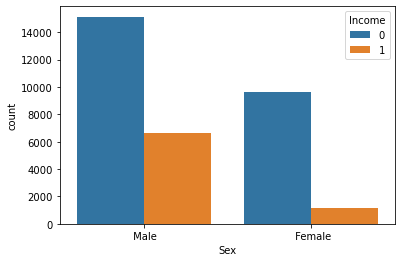

<Figure size 1080x1080 with 0 Axes>

In [40]:
graphs('Sex','Income',df)

#### From the graph, we observe that from all males only 30.5% of males are getting more than 50k income and in females, almost 11% of females are getting income more than 50k in income.

In [41]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [42]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income             int32
dtype: object

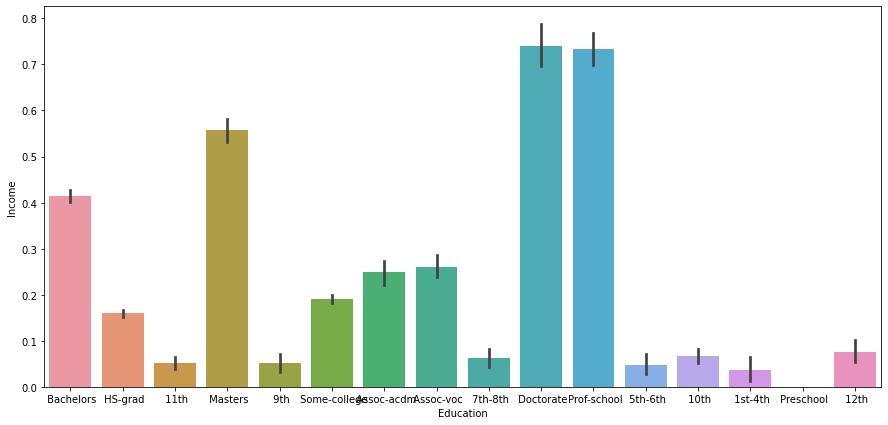

In [43]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'Education',y = 'Income',data = df)

plt.show()

### we observe Doctorate, Pre-school, master, and bachelor's are having a high income.

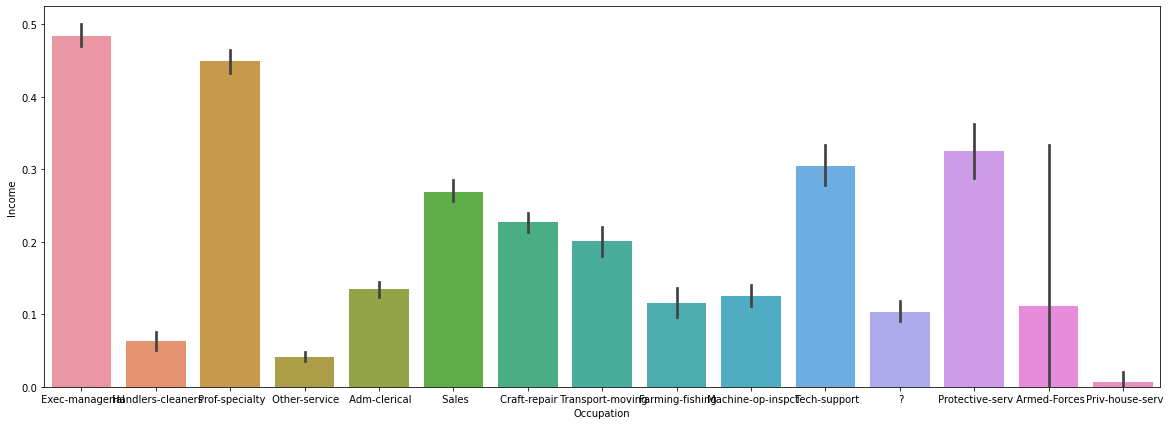

In [45]:
plt.figure(figsize=(20,7))
sns.barplot(x = 'Occupation',y = 'Income',data = df)

plt.show()

### From Occupation wise Exec-manager, Prof-speciality,tech-support is having a high income.

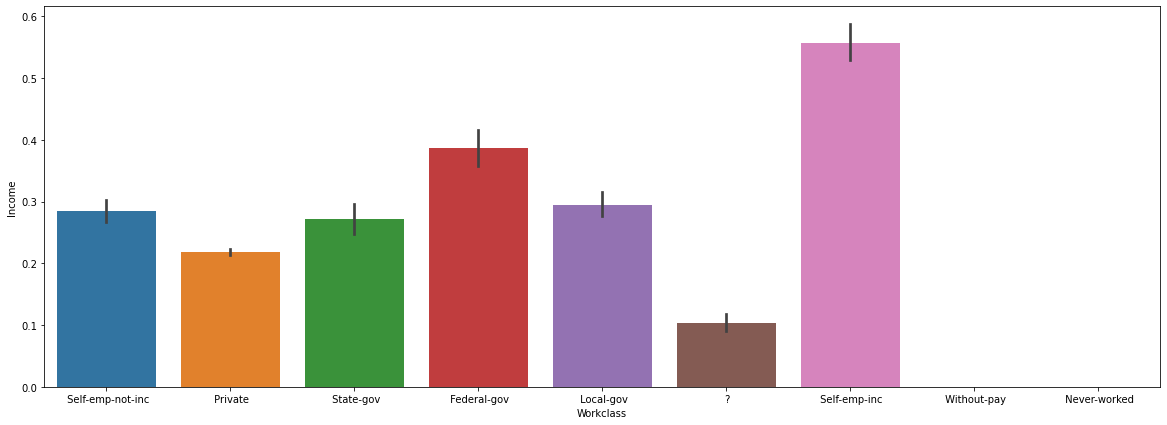

In [46]:
plt.figure(figsize=(20,7))
sns.barplot(x = 'Workclass',y = 'Income',data = df)

plt.show()

#### From Graph work-class wise if you are having self business and working in Federal Government then your income is high.

In [47]:

df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income             int32
dtype: object

# Applying Label Encoder to categorical columns

In [48]:
df.Income.value_counts() / len(df.Income)

0    0.759183
1    0.240817
Name: Income, dtype: float64

In [49]:
df2=le.fit_transform(df['Workclass'])
pd.Series(df1)
df['Workclass']=df2

In [50]:
df3=le.fit_transform(df['Education'])
pd.Series(df1)
df['Education']=df3

In [51]:
df4=le.fit_transform(df['Marital_status'])
pd.Series(df1)
df['Marital_status']=df4

In [52]:
df5=le.fit_transform(df['Occupation'])
pd.Series(df1)
df['Occupation']=df5

In [53]:
df6=le.fit_transform(df['Relationship'])
pd.Series(df1)
df['Relationship']=df6

In [54]:
df7=le.fit_transform(df['Race'])
pd.Series(df1)
df['Race']=df7

In [55]:
df8=le.fit_transform(df['Sex'])
pd.Series(df1)
df['Sex']=df8

In [56]:
df9=le.fit_transform(df['Native_country'])
pd.Series(df1)
df['Native_country']=df9

In [57]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

### Splitting the label and feature to apply SMOTE

In [58]:
# seperate label n feature
X=df.drop('Income' , axis=1)
y=df.Income

In [59]:

from sklearn.model_selection import train_test_split,GridSearchCV

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=41)

In [61]:
#to see how much data is going to y_train set
from collections import Counter
Counter(y_train)

Counter({0: 18545, 1: 5875})

# Import SMOTE

In [62]:
#balancing the dataset using upsampling or Oversampling technique (SMOTE)
from imblearn.over_sampling import SMOTE

In [63]:
from imblearn.over_sampling import SMOTE
ove_smp = SMOTE(sampling_strategy=0.75)
X_train_ns, y_train_ns = ove_smp.fit_resample(X_train, y_train)
print('the number of classes before fit:', format(Counter(y_train)))
print('the number of classes after fit:', format(Counter(y_train_ns)))

the number of classes before fit: Counter({0: 18545, 1: 5875})
the number of classes after fit: Counter({0: 18545, 1: 13908})


In [64]:
df.Capital_gain.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [65]:
df.Capital_loss.value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [66]:
#describe dataset
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


#### Observations
There is no null values

we have remove the duplicates

the row count is now after removing duplicate is 32536 and 15 columns

we will drop Fnlwgt

in capital loss and captial gain we see problem in that as std is greater than mean

#### Plotting the heatmap to observe Co-relation

In [67]:
corr=df.corr()
corr.shape

(15, 15)

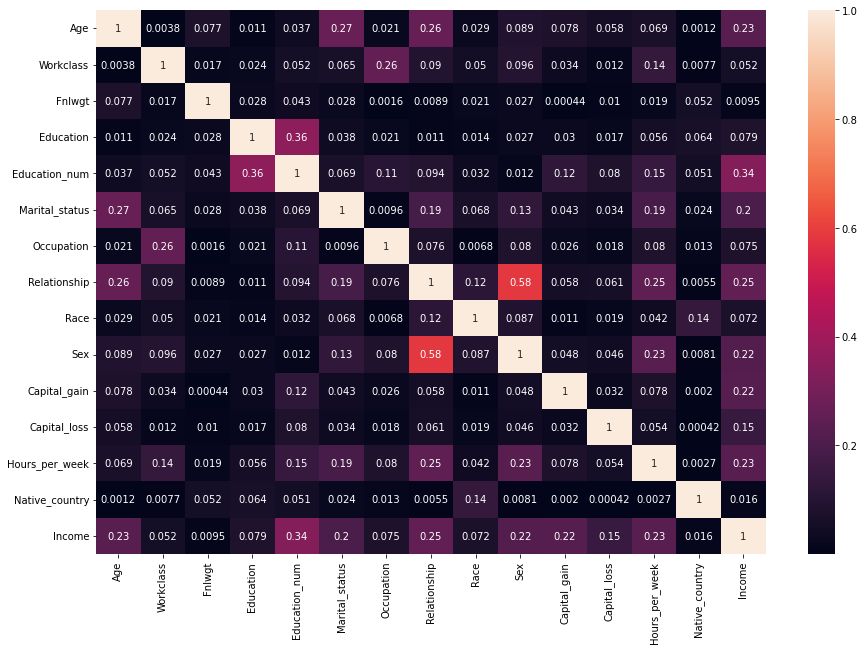

In [68]:
corr=df.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

#### From the heatmap, we observe that All the features contribute very small to predict the target variable and we observe sex vs relationship there is a 58% relationship which is ok and we don't we any multi-collinearity problem exists.

# 
## Plotting Histogram plot to see how data is distributed on an interval scale.

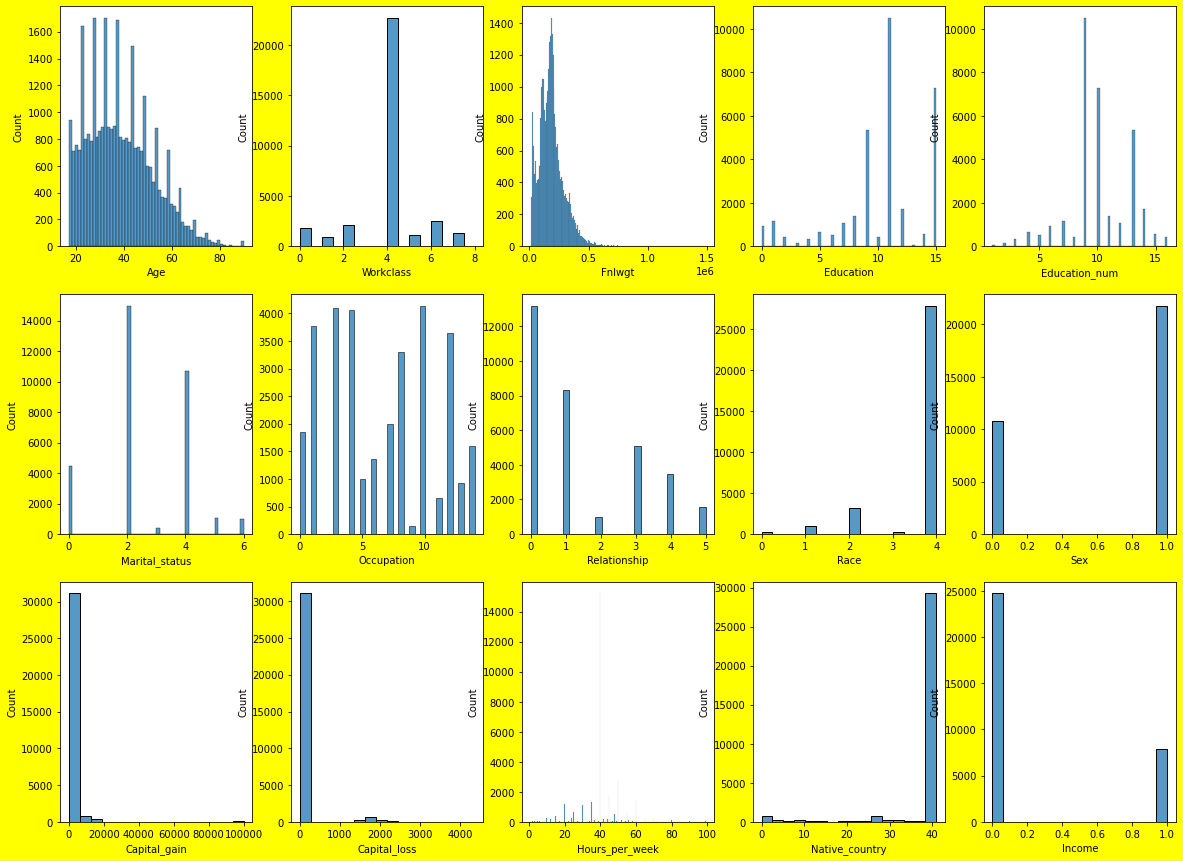

In [69]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.histplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

# Plotting Distribution plot to see how data is distributed

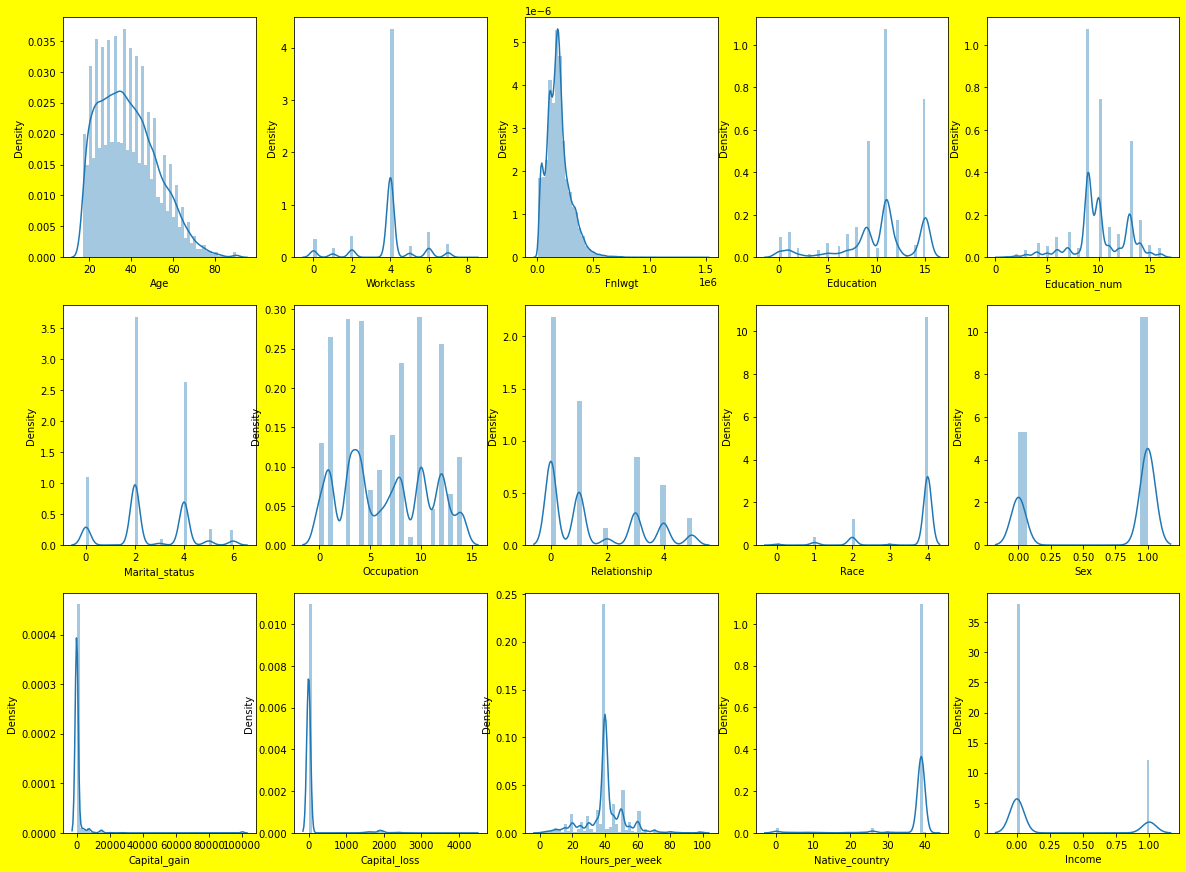

In [70]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()


### From Histogram and Distribution Graph we see a small amount of skewness in age and education number and we observe a large amount of skewness in capital gain and capital loss and hours per week.

In [72]:
X = df.drop(['Income'],axis = 1)
y = df['Income']

### Plotting Scatter plot to see realtion between feature and label

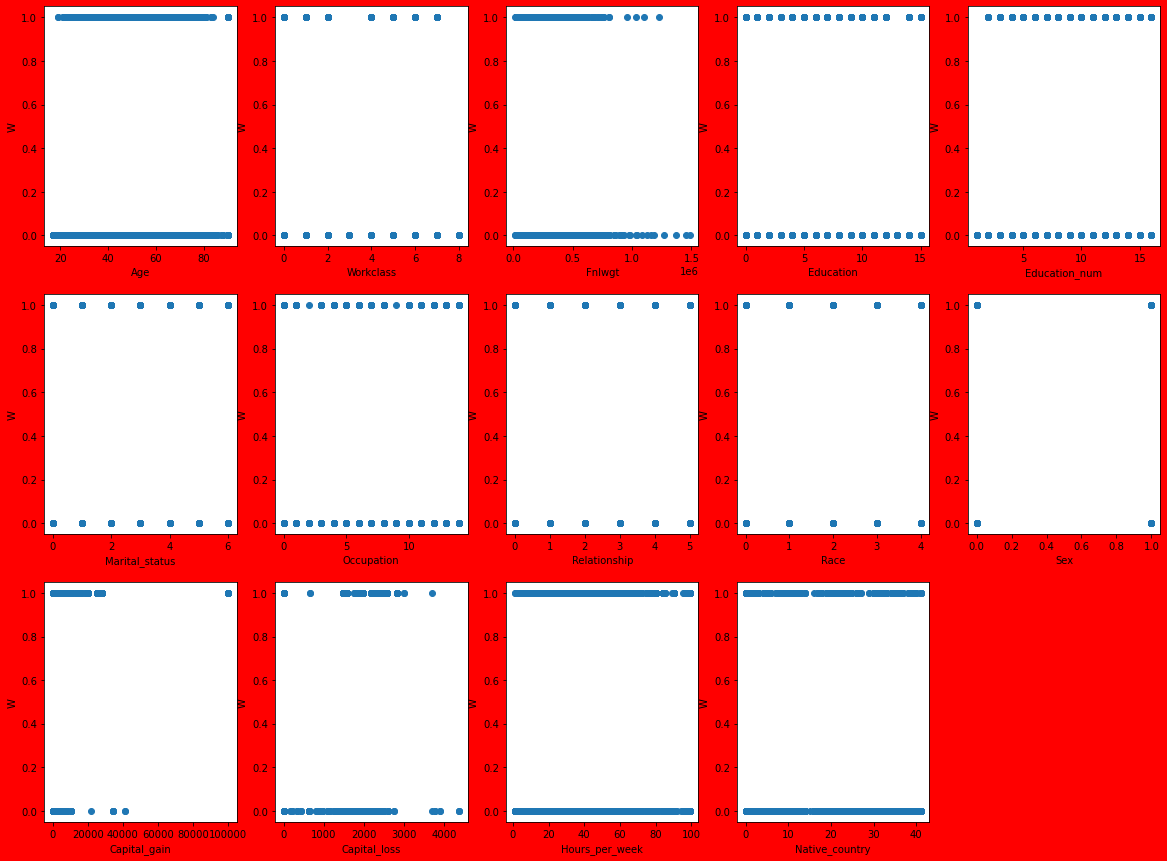

In [73]:
# so find relationship between feature(X) and label(y) by visulization using scatter plot

plt.figure(figsize = (20,15) , facecolor = 'red')
plotnumber = 1

for column in X:   #here feature is new X so X
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        plt.scatter(X[column] , y)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('W' , fontsize = 10)
    plotnumber += 1
plt.show()

### Plotting Regression plot to see realtion between feature and label

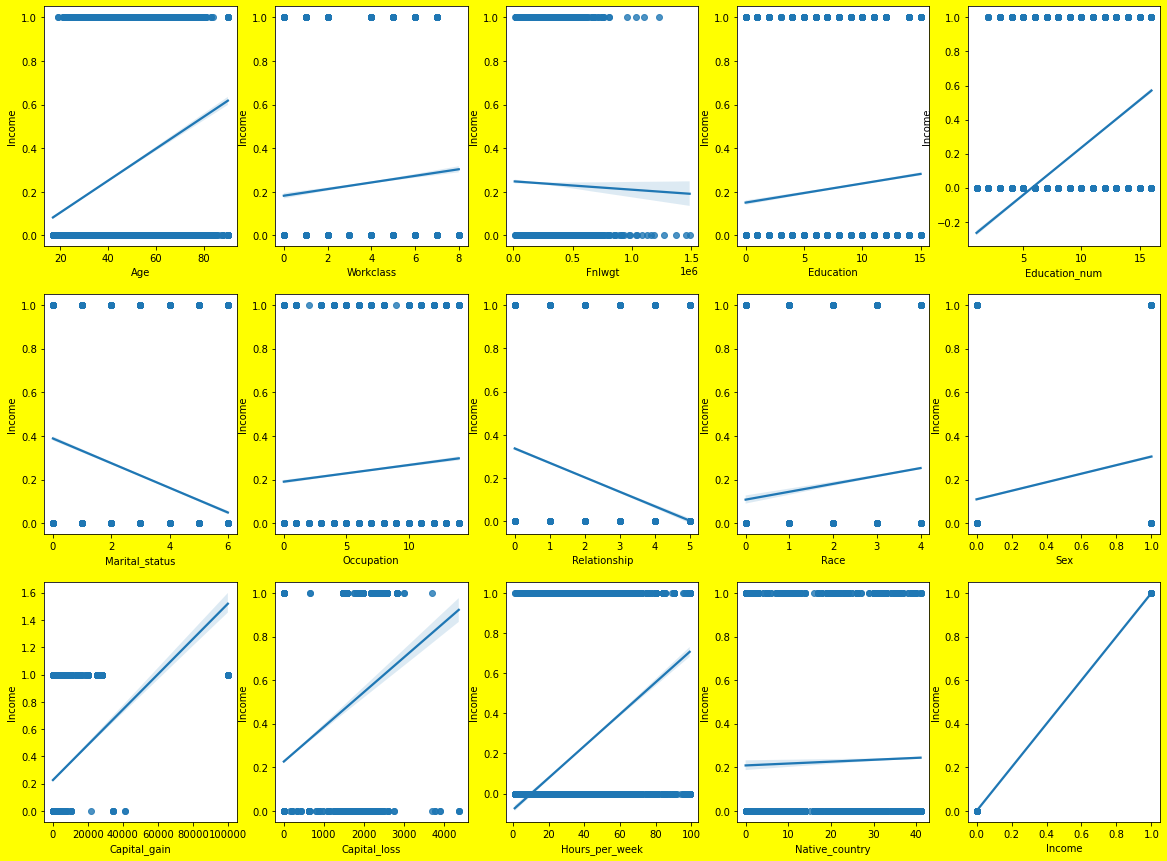

In [74]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.regplot (df[column],y)
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

#### From the Scatter plot and regression plot, we observe positive relationships with our target variable in almost all the features except Marital status, a Relationship which is negatively correlated to our target variable, and FNlwgt we are going to delete that column in the furthor step.

# Plotting Box plot to see outliers are present are not

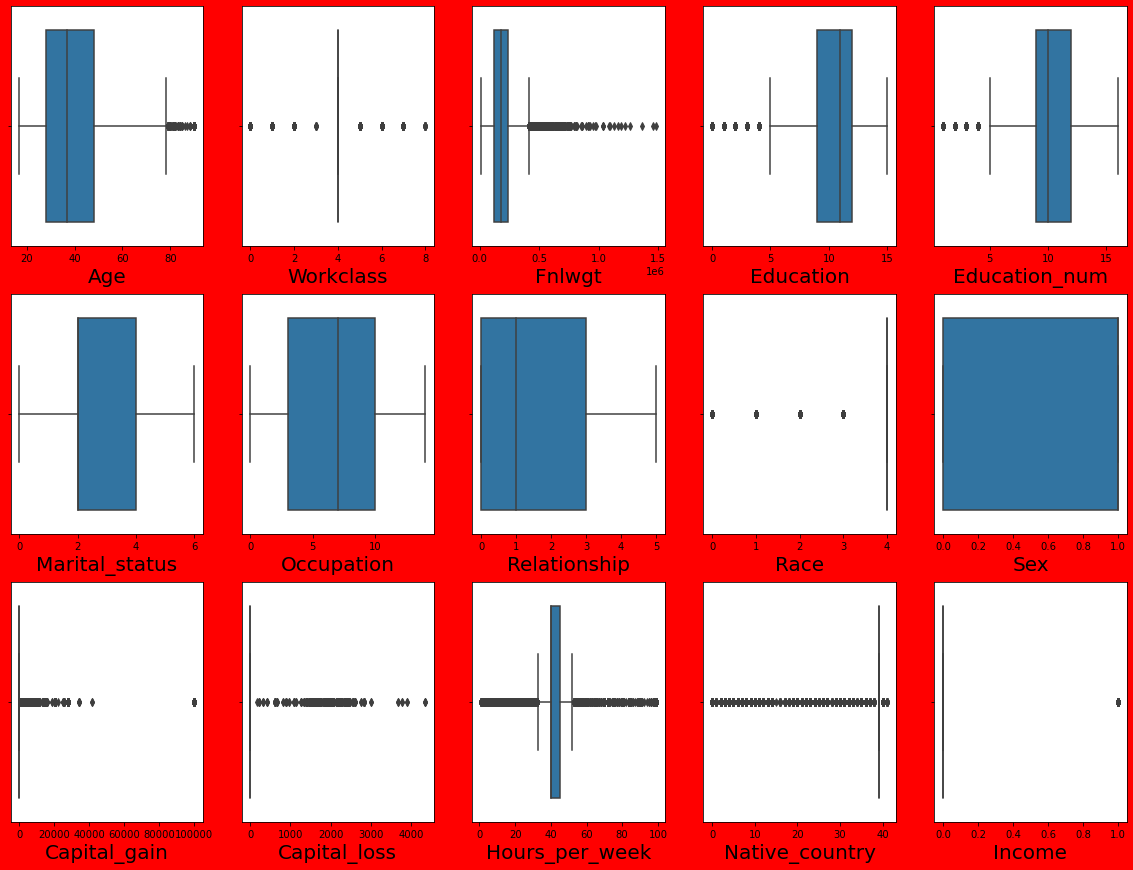

In [75]:
plt.figure(figsize=(20,15) , facecolor = 'red')
graph = 1

for column in df:
    
    if graph <= 15:
        plt.subplot (3,5,graph)
        ax = sns.boxplot(df[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

### From the boxplot, we observe a large number of outliers and we are going to treat outliers with the IQR method.

In [76]:
# FINDING THE IQR (inter quantile range) TO IDENTIFY OUTLIERS

#1ST QUNATILE
q1 = df.quantile(0.25)
q1

#2nd quantile
q3 = df.quantile(0.75)
q3

#IQR
iqr = q3 - q1
iqr

Age                   20.0
Workclass              0.0
Fnlwgt            119223.0
Education              3.0
Education_num          3.0
Marital_status         2.0
Occupation             7.0
Relationship           3.0
Race                   0.0
Sex                    1.0
Capital_gain           0.0
Capital_loss           0.0
Hours_per_week         5.0
Native_country         0.0
Income                 0.0
dtype: float64

In [77]:
#validating outlier 
preg_high = (q3.Age + (1.5*iqr.Age))
preg_high
# to check how many outliers in preg column 
outlier_high = np.where(df['Age']>preg_high)
outlier_high
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape
#once you delete you should reset index
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32412,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32413,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32414,32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32415,32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [78]:
#validating outlier 
preg_high = (q3.Hours_per_week + (1.5*iqr.Hours_per_week))
preg_high
# to check how many outliers in preg column 
outlier_high = np.where(df['Hours_per_week']>preg_high)
outlier_high
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape
#once you delete you should reset index
df.reset_index()


,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28929,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
28930,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
28931,32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
28932,32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [80]:
#validating outlier 
preg_high = (q3.Capital_gain + (1.5*iqr.Capital_gain))
preg_high
# to check how many outliers in preg column 
outlier_high = np.where(df['Capital_gain']>preg_high)
outlier_high
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape
#once you delete you should reset index
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26669,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
26670,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
26671,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
26672,32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [81]:
#validating outlier 
preg_high = (q3.Capital_loss + (1.5*iqr.Capital_loss))
preg_high
# to check how many outliers in preg column 
outlier_high = np.where(df['Capital_loss']>preg_high)
outlier_high
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape
#once you delete you should reset index
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25402,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
25403,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
25404,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
25405,32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [82]:
blood_low = (q1.Education - (1.5*iqr.Education))
blood_low

outlier_low = np.where(df['Education']<blood_low)
outlier_low

df=df.drop(df.index[outlier_low])
df.shape
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
3,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
4,5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22769,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
22770,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
22771,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
22772,32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [83]:
blood_low = (q1.Education_num - (1.5*iqr.Education_num))
blood_low

outlier_low = np.where(df['Education_num']<blood_low)
outlier_low

df=df.drop(df.index[outlier_low])
df.shape
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
3,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
4,5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22208,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
22209,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
22210,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
22211,32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [84]:
blood_low = (q1.Race - (1.5*iqr.Race))
blood_low

outlier_low = np.where(df['Race']<blood_low)
outlier_low

df=df.drop(df.index[outlier_low])
df.shape
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
3,6,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
4,11,23,4,122272,9,13,4,1,3,4,0,0,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18793,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
18794,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
18795,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
18796,32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [85]:
blood_low = (q1.Hours_per_week - (1.5*iqr.Hours_per_week))
blood_low

outlier_low = np.where(df['Hours_per_week']<blood_low)
outlier_low

df=df.drop(df.index[outlier_low])
df.shape
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
1,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
2,6,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
3,15,25,6,176756,11,9,4,5,3,4,1,0,0,35,39,0
4,16,32,4,186824,11,9,4,7,4,4,1,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15410,32553,53,4,321865,12,14,2,4,0,4,1,0,0,40,39,1
15411,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
15412,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
15413,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1


In [86]:
blood_low = (q1.Native_country - (1.5*iqr.Native_country))
blood_low

outlier_low = np.where(df['Native_country']<blood_low)
outlier_low

df=df.drop(df.index[outlier_low])
df.shape
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
1,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
2,6,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
3,15,25,6,176756,11,9,4,5,3,4,1,0,0,35,39,0
4,16,32,4,186824,11,9,4,7,4,4,1,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14384,32553,53,4,321865,12,14,2,4,0,4,1,0,0,40,39,1
14385,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
14386,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
14387,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1


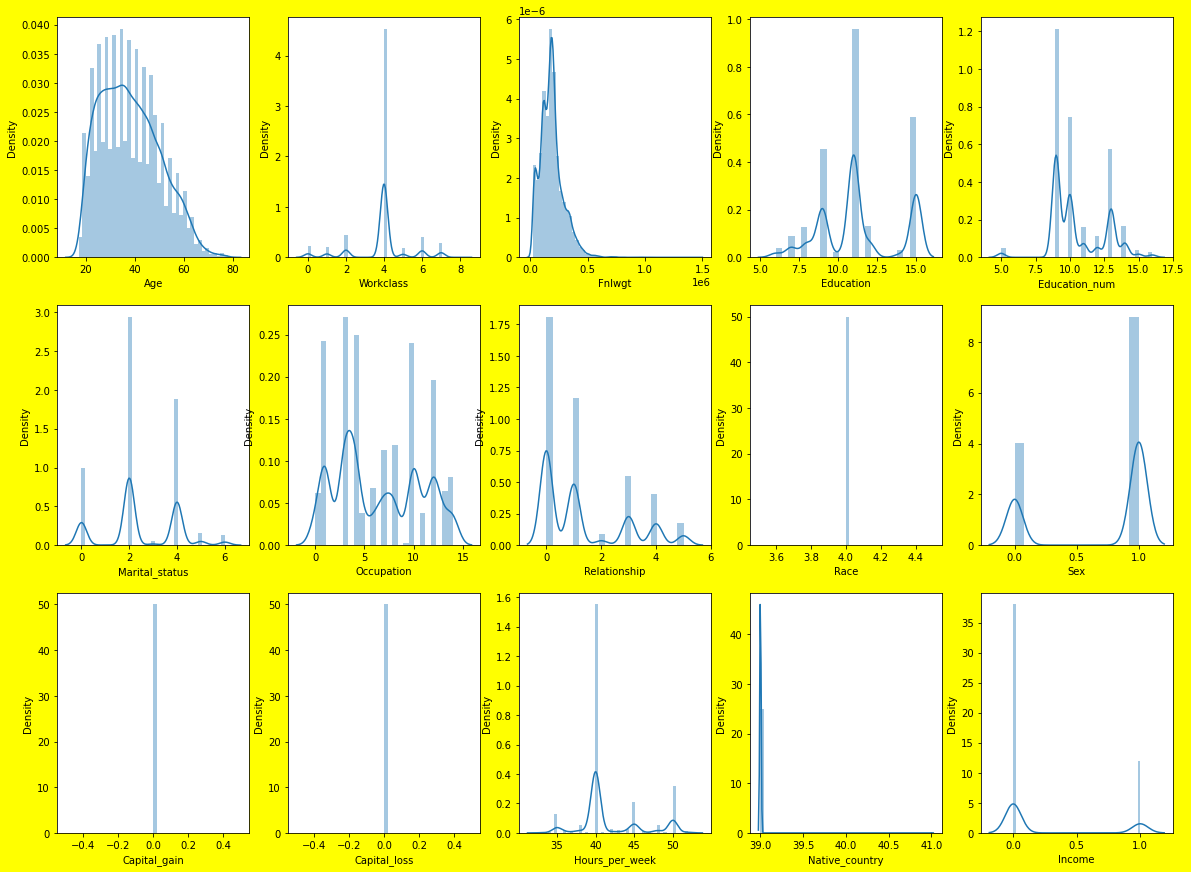

In [87]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

#### Plotting distribution plot again to observe the distribution after removing the outliers. 

In [86]:
### finding correlation between feature and lable using CORR method

In [88]:
# finding correlation between feature n lable using CORR method
#  (code type      --   feature corrwith label)

df.drop('Income' , axis =1 ).corrwith (df.Income)

Age               0.257965
Workclass         0.006705
Fnlwgt            0.013609
Education        -0.048932
Education_num     0.276021
Marital_status   -0.154551
Occupation        0.076129
Relationship     -0.231901
Race                   NaN
Sex               0.205450
Capital_gain           NaN
Capital_loss           NaN
Hours_per_week    0.166154
Native_country    0.002200
dtype: float64

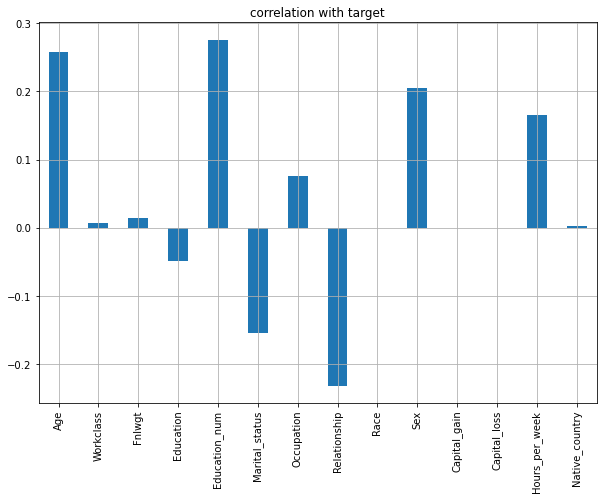

In [89]:
# convert above numbers into graph for better understanding
df.drop('Income' , axis = 1).corrwith (df.Income).plot(kind = 'bar' , grid=True , figsize = (10,7) , title = 'correlation with target')

plt.show()

### From the above graph Age, Education-num, Occupation, Sex, Hours-per-week, Work class, and Native-country are positively Co-related to our target variable while Education, Maritial-status and relationship are negatively co-related to our target variable.

#### Dropping unwanted columns

In [90]:
df.drop(['Fnlwgt','Capital_gain', 'Capital_loss','Race'],axis=1,inplace = True)

In [91]:
X = df.drop(['Income'],axis = 1)
y = df['Income']

In [92]:
X

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Hours_per_week,Native_country
1,38,4,11,9,0,6,1,1,40,39
4,37,4,12,14,2,4,5,0,40,39
6,52,6,11,9,2,4,0,1,45,39
15,25,6,11,9,4,5,3,1,35,39
16,32,4,11,9,4,7,4,1,40,39
...,...,...,...,...,...,...,...,...,...,...
32553,53,4,12,14,2,4,0,1,40,39
32554,22,4,15,10,4,11,1,1,40,39
32555,27,4,7,12,2,13,5,0,38,39
32556,40,4,11,9,2,7,0,1,40,39


#### Dropping unwanted columns

In [93]:
X = df.drop(['Income'],axis = 1)
y = df['Income']

In [94]:
X

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Hours_per_week,Native_country
1,38,4,11,9,0,6,1,1,40,39
4,37,4,12,14,2,4,5,0,40,39
6,52,6,11,9,2,4,0,1,45,39
15,25,6,11,9,4,5,3,1,35,39
16,32,4,11,9,4,7,4,1,40,39
...,...,...,...,...,...,...,...,...,...,...
32553,53,4,12,14,2,4,0,1,40,39
32554,22,4,15,10,4,11,1,1,40,39
32555,27,4,7,12,2,13,5,0,38,39
32556,40,4,11,9,2,7,0,1,40,39


# Scaling the data


In [96]:
#scale our data using standard sclar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

# Checking for the multicollinearity Using VIF

In [97]:
# now we check for multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]  


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature

vif['features']=X.columns  # seperate column for column features

vif

,vif,features
0,1.153505,Age
1,1.037042,Workclass
2,1.047610,Education
3,1.088719,Education_num
4,1.111200,Marital_status
5,1.068897,Occupation
6,1.566468,Relationship
7,1.497729,Sex
8,1.065779,Hours_per_week
9,1.000381,Native_country


# DecisionTreeClassifier Model

In [98]:
#import necessary librarys
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier #if regression then regressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Finding the best Random state

In [99]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train_ns,y_train_ns)
    
    y_pred=dt.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.7584769316286826 RandomState 1


MAXINING TESTING SCORE 0.7584769316286826 ON RANDOM STATE OF 1
Testing Accuracy 0.7556976097832129 RandomState 2


Testing Accuracy 0.7670928293496387 RandomState 3


MAXINING TESTING SCORE 0.7670928293496387 ON RANDOM STATE OF 3
Testing Accuracy 0.7623679822123401 RandomState 4


Testing Accuracy 0.7662590327959978 RandomState 5


Testing Accuracy 0.7576431350750417 RandomState 6


Testing Accuracy 0.7570872707059477 RandomState 7


Testing Accuracy 0.763479710950528 RandomState 8


Testing Accuracy 0.7618121178432462 RandomState 9


Testing Accuracy 0.7668148971650918 RandomState 10


Testing Accuracy 0.754863813229572 RandomState 11


Testing Accuracy 0.7757087270705948 RandomState 12


MAXINING TESTING SCORE 0.7757087270705948 ON RANDOM STATE OF 12
Testing Accuracy 0.774041133963313 RandomState 13


Testing Accuracy 0.7643135075041689 RandomState 14


Testing Accuracy 0.7598665925514174 RandomState 15


Testing Accuracy 0.76931628

In [100]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.7757087270705948 On Random State 12


# Training the model

In [110]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=22)

In [111]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [112]:
# model initilization
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier()

In [113]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 95.561116%
====Testing Score====
Accuracy score : 76.764869%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.84      0.86      0.85      2758
           1       0.50      0.48      0.49       840

    accuracy                           0.77      3598
   macro avg       0.67      0.67      0.67      3598
weighted avg       0.76      0.77      0.77      3598



### Model Score
Training Score = 95.561116%

Testing Score = 76.681490%

# Hyperparameter For DecisionTree Classifier

In [126]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
grid_param = {
                'criterion':['gini','entropy'],
                'max_depth':range(1,30),
                'min_samples_leaf':range(1,5),
                'min_samples_split':range(5,10),
                'max_leaf_nodes':range(1,10)
}

In [121]:
# here we are define some parameter and ask gridsearchcv which one is best
grid_search = GridSearchCV (estimator = clf_dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [122]:
#pass dataset to train 
grid_search.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, min_samples_split=5),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                         'max_leaf_nodes': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(5, 10)})

In [127]:
# see best parameters
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [128]:
#initiate what new parameter we got

clf_dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 3, min_samples_leaf= 1, min_samples_split= 5)
clf_dt.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

In [125]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 81.234362%
====Testing Score====
Accuracy score : 81.211784%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.84      0.93      0.88      2758
           1       0.65      0.42      0.51       840

    accuracy                           0.81      3598
   macro avg       0.75      0.68      0.70      3598
weighted avg       0.80      0.81      0.80      3598



# Model Scores With Hyperparameter Tuning
Training Score = 81.277819%
Testing Score = 81.223922%

In [129]:
### if you want to check confusion matrix

y_pred=clf_dt.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[2565,  193],
       [ 483,  357]], dtype=int64)

# RandomForest Classifier Model

In [130]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier #RandomForestRegressor if regression problem
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [131]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train_ns,y_train_ns)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.7912729294052251 RandomState 1


MAXINING TESTING SCORE 0.7912729294052251 ON RANDOM STATE OF 1
Testing Accuracy 0.7882156753752084 RandomState 2


Testing Accuracy 0.7971095052807116 RandomState 3


MAXINING TESTING SCORE 0.7971095052807116 ON RANDOM STATE OF 3
Testing Accuracy 0.7946081156197887 RandomState 4


Testing Accuracy 0.802668148971651 RandomState 5


MAXINING TESTING SCORE 0.802668148971651 ON RANDOM STATE OF 5
Testing Accuracy 0.7868260144524736 RandomState 6


Testing Accuracy 0.7882156753752084 RandomState 7


Testing Accuracy 0.7937743190661478 RandomState 8


Testing Accuracy 0.7957198443579766 RandomState 9


Testing Accuracy 0.7882156753752084 RandomState 10


Testing Accuracy 0.7915508615897721 RandomState 11


Testing Accuracy 0.8087826570316843 RandomState 12


MAXINING TESTING SCORE 0.8087826570316843 ON RANDOM STATE OF 12
Testing Accuracy 0.8012784880489161 RandomState 13


Testing Accuracy 0.7896053362979433 RandomState 14


Testing Accuracy

In [224]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.807510431154381 On Random State 2


In [225]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [226]:
# model initilization
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [227]:
# call the function
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 95.752967%
====Testing Score====
Accuracy score : 79.610570%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.85      0.89      0.87      2743
           1       0.58      0.49      0.53       852

    accuracy                           0.80      3595
   macro avg       0.72      0.69      0.70      3595
weighted avg       0.79      0.80      0.79      3595



# Model Scores
Training Score 95.752967%
Testing Score = 79.610570%

# Hyperparameter For RandomForestClassifier

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the classifier
clf = RandomForestClassifier()


In [139]:
# Define the parameter grid
params_grid = {
    'n_estimators': range(1, 5),
    'criterion': ['entropy', 'gini'],
    'max_depth': range(1, 30),
    'min_samples_split': range(5, 10),
    'min_samples_leaf': range(1, 10)
}

# Fit the GridSearchCV object to your data
grd.fit(X, y)  # Replace X and y with your actual data




GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(5, 10),
                         'n_estimators': range(1, 5)})

In [140]:
# Print the best parameters
print("Best parameters:", grd.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 7, 'min_samples_split': 8, 'n_estimators': 4}


In [141]:
#initiate what new parameter we got
rf=RandomForestClassifier(criterion= 'gini', max_depth = 25, min_samples_leaf= 8, min_samples_split= 7,n_estimators= 4)
rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier(max_depth=25, min_samples_leaf=8, min_samples_split=7,
                       n_estimators=4)

In [142]:
#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

In [143]:
# call the function
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 84.422204%
====Testing Score====
Accuracy score : 81.100611%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.86      0.91      0.88      2765
           1       0.61      0.49      0.55       833

    accuracy                           0.81      3598
   macro avg       0.74      0.70      0.71      3598
weighted avg       0.80      0.81      0.80      3598



### Model Scores

  Testing Score : 84.422204%
  
  Training  Score : 81.100611%

# Support Vector Machine Model

In [146]:
# Import necessary model #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
# svc model 
# for classification
from sklearn.svm import SVC

In [147]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    svc=SVC()
    svc.fit(X_train_ns,y_train_ns)
    
    y_pred=svc.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.8135075041689828 RandomState 1


MAXINING TESTING SCORE 0.8135075041689828 ON RANDOM STATE OF 1
Testing Accuracy 0.8004446914952752 RandomState 2


Testing Accuracy 0.8168426903835464 RandomState 3


MAXINING TESTING SCORE 0.8168426903835464 ON RANDOM STATE OF 3
Testing Accuracy 0.8165647581989994 RandomState 4


Testing Accuracy 0.8246247915508615 RandomState 5


MAXINING TESTING SCORE 0.8246247915508615 ON RANDOM STATE OF 5
Testing Accuracy 0.8062812673707616 RandomState 6


Testing Accuracy 0.8148971650917176 RandomState 7


Testing Accuracy 0.8232351306281267 RandomState 8


Testing Accuracy 0.8171206225680934 RandomState 9


Testing Accuracy 0.8151750972762646 RandomState 10


Testing Accuracy 0.81100611450806 RandomState 11


Testing Accuracy 0.8232351306281267 RandomState 12


Testing Accuracy 0.8185102834908282 RandomState 13


Testing Accuracy 0.8137854363535297 RandomState 14


Testing Accuracy 0.8060033351862146 RandomState 15


Testing Accuracy 0.82045580

In [148]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.8251806559199555 On Random State 46


### training the data

In [150]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=33)

In [151]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [152]:
clf_svc=SVC()
clf_svc.fit(X_train_ns,y_train_ns)

SVC()

In [153]:
# call the function
metric_score (clf_svc,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_svc,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 81.558706%
====Testing Score====
Accuracy score : 82.101167%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.84      0.94      0.89      2732
           1       0.70      0.44      0.54       866

    accuracy                           0.82      3598
   macro avg       0.77      0.69      0.72      3598
weighted avg       0.81      0.82      0.81      3598



# Model Score
 Testing Score : 81.558706%
  
  Training Score : 82.101167%

# Hyperparameter Tuning for SVC

In [154]:
## HYPERPARAMETER TUNING ##
# here we tune only 2 parameter c and gamma
# where c = how much error we allow model to do 
# gamma = it decide how much curvature we want in a decision boundary 

from sklearn.model_selection import GridSearchCV

In [155]:
param_grid={'C':[1,5,10,20],
           'gamma':[0.001,0.01,0.02,0.002]}

In [156]:
# here we are define some parameter and ask gridsearchcv which one is best
gridsearch=GridSearchCV(svc,param_grid)

In [157]:
#pass dataset to train 
gridsearch.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'gamma': [0.001, 0.01, 0.02, 0.002]})

In [158]:
#best parameters
gridsearch.best_params_

{'C': 20, 'gamma': 0.02}

In [159]:
# update our model and train again for new score 
svc=SVC(C=20,gamma=0.02)
svc.fit(X_train_ns,y_train_ns)

SVC(C=20, gamma=0.02)

In [160]:
# call the function
metric_score (svc,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (svc,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 81.456770%
====Testing Score====
Accuracy score : 82.240133%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.84      0.94      0.89      2732
           1       0.70      0.45      0.55       866

    accuracy                           0.82      3598
   macro avg       0.77      0.70      0.72      3598
weighted avg       0.81      0.82      0.81      3598



# Model Score
Testing Score : 81.456770%


Training Score :82.240133% 

### Confusion Matrix

In [161]:
### if you want to check confusion matrix

y_pred=svc.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[2565,  167],
       [ 472,  394]], dtype=int64)

# KNeighborsClassifier Model

In [162]:
#import necessary library

import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [163]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.8293496386881601 RandomState 1


MAXINING TESTING SCORE 0.8293496386881601 ON RANDOM STATE OF 1
Testing Accuracy 0.8293496386881601 RandomState 2


Testing Accuracy 0.8365758754863813 RandomState 3


MAXINING TESTING SCORE 0.8365758754863813 ON RANDOM STATE OF 3
Testing Accuracy 0.8332406892718177 RandomState 4


Testing Accuracy 0.8465814341300723 RandomState 5


MAXINING TESTING SCORE 0.8465814341300723 ON RANDOM STATE OF 5
Testing Accuracy 0.8260144524735964 RandomState 6


Testing Accuracy 0.8357420789327404 RandomState 7


Testing Accuracy 0.8354641467481935 RandomState 8


Testing Accuracy 0.8382434685936632 RandomState 9


Testing Accuracy 0.830461367426348 RandomState 10


Testing Accuracy 0.8365758754863813 RandomState 11


Testing Accuracy 0.840188993885492 RandomState 12


Testing Accuracy 0.8413007226236798 RandomState 13


Testing Accuracy 0.8335186214563647 RandomState 14


Testing Accuracy 0.8371317398554753 RandomState 15


Testing Accuracy 0.83740967

In [164]:
print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 0.8479710950528071 ON RANDOM STATE OF 46


In [165]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=83)

In [166]:
#write one function and call as many time as you want
def metric_score (clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        pred = clf.predict(X_train)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train,pred)*100:2f}%")
        
    elif train==False:
        y_pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,y_pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,y_pred,digits=2))

In [167]:
# model initilization
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [168]:
# call the function
metric_score (clf_knn,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_knn,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 85.682513%
====Testing Score====
Accuracy score : 79.405225%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.85      0.88      0.87      2747
           1       0.57      0.51      0.54       851

    accuracy                           0.79      3598
   macro avg       0.71      0.70      0.70      3598
weighted avg       0.79      0.79      0.79      3598



# Model Scores: 
    Testing Score  : 85.682513%
    
    Training Score  : 79.405225%

# Hyperparameter For KNeighborsClassifier

In [169]:
from sklearn.model_selection import GridSearchCV
param_grid={'algorithm':['kd_tree','brute'],
            'leaf_size':[3,5,6,7,8],
            'n_neighbors':[3,5,7,9,11,13]}

In [170]:

# now call grid search and say that we are going to use knn model

gridsearch=GridSearchCV(estimator=clf_knn , param_grid=param_grid)

In [171]:
#give the data to object
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [172]:
#see the best paramater
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 5, 'n_neighbors': 13}

In [173]:
# we will use the best parameter in our knn algorithm and check if accuracy is increase or not
clf_knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors = 11)

clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=11)

In [174]:
metric_score(clf_knn,X_train,X_test,y_train,y_test,train=True)

metric_score(clf_knn,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 83.773515%
====Testing Score====
Accuracy score : 80.850472%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.86      0.89      0.88      2747
           1       0.61      0.53      0.57       851

    accuracy                           0.81      3598
   macro avg       0.73      0.71      0.72      3598
weighted avg       0.80      0.81      0.80      3598



# Model Score : 
   Training Score : 80.850472%
   
   
    Testing Score :  83.773515%